# **Chapter 2 자연어와 단어의 분산 표현**

## **2.1 자연어 처리란**

한국어와 영어 등 우리가 평소에 쓰는 말을 자연어라고 한다. 자연어 처리란 자연어를 처리하는 분야로, 알기 쉽게 풀어보면 '우리의 말을 컴퓨터에게 이해시키기 위한 기술(분야)'이다. 자연어 처리 기술이 사용되는 예로 검색 엔진, 기계 번역, 질의응답 시스템, IME(입력기 전환), 문장 자동요약과 감정분석 등이 있다. 

### **2.1.1 단어의 의미**

단어는 의미의 최소 단위이다. 따라서 자연어를 컴퓨터에게 이해시키는 데는 무엇보다 '단어의 의미'를 이해시키는 게 중요하다. 2장에서는 사람의 손으로 만든 시소러스(유의어 사전)를 이용하는 방법과 통계 정보로부터 단어를 표현하는 '통계 기반 기법'을 설명한다.

## **2.2 시소러스**

자연어 처리의 역사를 되돌아보면 단어의 의미를 인력을 동원해 정의하려는 시도는 수없이 있어왔다. 그러나 사람이 이용하는 일반적인 사전이 아니라 시소러스 형태의 사전을 애용했다. 시소러스란 유의어 사전으로, '뜻이 같은 단어(동의어)'나 '뜻이 비슷한 단어(유의어)'가 한 그룹으로 분류되어 있다. 또한 자연어 처리에 이용되는 시소러스에서는 단어 사이의 '상위와 하위' 혹은 '전체와 부분' 등, 더 세세한 관계까지 정의해둔 경우가 있다. 

모든 단어에 대한 유의어 집합을 만든 다음, 단어들의 관계를 그래프로 표현하여 단어 사이의 연결을 정의할 수 있다. 그러면 이 단어 네트워크를 이용하여 컴퓨터에게 단어 사이의 관계를 가르칠 수도 있다. 

시소러스를 사용하는 예로는 검색 엔진이 있다. automobile과 car이 유의어임을 알고 있으면 car의 검색 결과에 automobile의 검색 결과도 포함시켜주면 좋을 것이다. 

### **2.2.1 WordNet**

자연어 처리 분야에서 가장 유명한 시소러스는 WordNet이 있따. WordNet을 사용하면 유의어를 얻거나 단어 네트워크를 이용할 수 있다. 또한 단어 네트워크를 사용해 단어 사이의 유사도를 구할 수도 있다.

### **2.2.2 시소러스의 문제점**

WordNet과 같은 시소러스에는 수많은 단어에 대한 동의어와 계층 구조 등의 관계가 정의돼있다. 하지만 이처럼 사람이 수작업으로 레이블링하는 방식에는 큰 결저이 존재한다. 

 1. 시대 변화에 대응하기 어렵다. 단어의 변화에 대응하기 위해서는 시소러스를 사람이 수작업으로 끊임없이 갱신해야 한다는 번거로움이 있다. 
 2. 사람을 쓰는 비용은 크다. 따라서 시소러스를 만드는 데 엄청난 인적 비용이 발생한다. 
 3. 단어의 미묘한 차이를 표현할 수 없다. 사소한 용법 차이 등을 수작업으로 표현하는 것은 상당히 곤란한 일이다. 

이 문제를 피하기 위해 사용하는 것이 통계 기반 기법과 신경망을 사용한 추론 기반 기법이다. 이 두 기법에서는 대량의 텍스트 데이터로부터 단어의 의미를 자동으로 추출한다. 사람이 수작업으로 시소러스나 관계(특징)를 설계하던 방식으로부터 사람의 개입을 최소로 줄이고 텍스트 데이터만으로 원하는 결과를 얻어내는 방향으로 패러다임이 바뀌고 있다.

## **2.3 통계 기반 기법**

말뭉치란 맹목적으로 수집된 텍스트 데이터가 아닌 자연어 처리 연구나 애플리케이션을 염두에 두고 수집된 대량의 텍스트 데이터를 말한다. 통계 기반 기법의 목표는 이처럼 사람의 지식으로 가득한 말뭉치에서 자동으로, 그리고 효율적으로 그 핵심을 추출하는 것이다. 

### **2.3.1 파이썬으로 말뭉치 전처리하기**

자연어 처리에는 위키백과와 구글 뉴스, 대문호의 작품들과 같이 다양한 말뭉치가 사용된다. 먼저 파이썬의 대화 모드를 이용하여 매우 작은 텍스트 데이터에 전처리를 해볼 것이다. 여기서 말하는 전처리는 텍스트 데이터를 단어로 분할하고 그 분할된 단어들을 단어 ID 목록으로 변환하는 일이다. 

In [0]:
text = 'You say goodbye and I say hello.'
text = text.lower()
text = text.replace('.',' .')
text

'you say goodbye and i say hello .'

간단한 예시 문장 하나를 text 변수에 저장했다.

lower() 메서드로 모든 문자를 소문자로 변환했다. 이후에 split() 메서드를 이용해 공백을 기준으로 분할해주기 위해 문장 끝의 마침표를 앞에 공백이 있는 마침표로 변환했다.

In [0]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

split() 메서드를 이용해 text를 단어 단위로 분할했다.

In [0]:
word_to_id = {}
id_to_word = {}

for word in words:
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id
    id_to_word[new_id] = word

단어를 텍스트 그대로 조작하는 것은 불편하기 때문에, 단어에 ID를 부여하고 ID의 리스트로 이용할 수 있도록 손질했다. 이를 위한 사전 준비로, 파이썬의 딕셔너리를 이용하여 단어 ID와 단어를 짝지어주는 대응표를 작성했다. 

단어 ID에서 단어로의 변환은 id_to_word가 담당하며, 단어에서 단어 ID로의 변환은 word_to_id가 담당한다. 

for문은 단어 단위로 분할된 words의 각 원소를 처음부터 하나씩 살펴보면서, 단어가 word_to_id에 들어 있지 않으면 word_to_id와 id_to_word 각각에 새로운 ID와 단어를 추가하도록 구현했다. 또한 추가 시점의 딕셔너리 길이가 새로운 단어의 ID로 설정되기 때문에 단어 ID는 0,1,2,... 식으로 증가한다. 

In [0]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [0]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

단어 ID와 단어의 대응표에 실제로 어떤 내용이 담겨 있는지 확인했다. 

In [0]:
id_to_word[1]

'say'

In [0]:
word_to_id['hello']

5

이처럼 딕셔너리를 사용하면 단어를 가지고 단어 ID를 검색하거나, 반대로 단어 ID를 가지고 단어를 검색할 수 있다. 

In [0]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

단어 목록을 단어 ID 목록으로 변경해보았다. 

먼저 파이썬의 내포 표기를 사용하여 단어 목록에서 단어 ID 목록으로 변환한 다음, 다시 넘파이 배열로 변환했다. (여기서 내포란, 리스트나 딕셔너리 등의 반복문 처리를 간단하게 쓰기 위한 기법이다. 예를 들어 xs = [1,2,3,4]라는 리스트의 각 원소를 제곱하여 새로운 리스트를 만들고 싶다면 [x**2 for x in xs] 처럼 된다.)

In [0]:
def preprocess(text):
  text = text.lower()
  text = text.replace('.',' .')
  words = text.split(' ')
  
  word_to_id = {}
  id_to_word = {}
  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word

  corpus = np.array([word_to_id[w] for w in words])

  return corpus, word_to_id, id_to_word

지금까지의 처리를 한 데 모아 preprocess() 함수로 구현해주었다. 

In [0]:
text = 'You say goodbye and I say hello.'
corpus,word_to_id,id_to_word = preprocess(text)

이 함수를 사용하여 말뭉치 전처리를 수행해주었다.

In [0]:
print(preprocess(text))

(array([0, 1, 2, 3, 4, 1, 5, 6]), {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}, {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})


In [0]:
print(corpus)

[0 1 2 3 4 1 5 6]


In [0]:
print(word_to_id)

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [0]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


전처리가 제대로 수행되었음을 확인했다.

### **2.3.2 단어의 분산 표현**

색을 표현할 때 고유한 이름을 붙여 표현할 수도 있지만 RGB라는 세 가지 성분이 어떤 비율로 섞여 있느냐로 표현할 수도 있다. 즉 색을 3차원의 벡터로 표현한다는 것인데, 이 방법이 색을 더 정확하게 명시할 수 있다. 모든 색을 단 3개의 성분으로 표현할 수 있으니 간결하고, 어떤 색인지 짐작하기도 쉬우며, 색끼리의 관련성도 쉽게 판단할 수 있다. 또한 정량화하기도 쉽다. 

색을 벡터로 표현할 수 있듯 단어 또한 벡터로 표현할 수 있는데, 이를 자연어 처리 분야에서는 단어의 분산 표현이라고 한다. 단어의 분산 표현은 단어를 고정 길이의 밀집벡터로 표현한다. 밀집벡터라 함은 대부분의 원소가 0이 아닌 실수인 벡터를 말한다. 

### **2.3.3 분포 가설**

단어를 벡터로 표현하는 중요한 기법들은 거의 모두 분포 가설('단어의 의미는 주변 단어에 의해 형성된다'는 아이디어)에 기초한다. 분포 가설이 말하고자 하는 바는 단어 자체에는 의미가 없고, 그 단어가 사용된 '맥락'이 의미를 형성한다는 것이다. 이번 장에서 '맥락'이라고 하면 주목하는 단어 주변에 놓인 단어를 가리킨다. 맥락의 크기(주변 단어를 몇 개나 포함할지)를 '윈도우 크기'라고 한다. 윈도우 크기가 1이면 좌우 한 단어씩이, 윈도우 크기가 2이면 좌우 두 단어씩이 맥락에 포함된다. 

### **2.3.4 동시발생 행렬**

통계 기반 기법이란 어떤 단어에 주목했을 때, 그 주변에 어떤 단어가 몇 번이나 등장하는지를 세어 집계하는 방법이다. 이는 분포 가설에 기초하는 방법이다. 

In [0]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [0]:
print(corpus)

[0 1 2 3 4 1 5 6]


In [0]:
print(id_to_word)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


먼저 preprocess() 함수를 사용해 전처리를 해주었다. 결과를 확인해보면 단어 수가 총 7개임을 알 수 있다. 

모든 단어에 대해 동시발생하는 단어를 표에 정리하면 행렬의 형태를 띠게 되는데, 이를 '동시발생 행렬'이라고 한다. 동시발생 행렬의 각 행은 해당 단어를 표현한 벡터가 된다. 

In [0]:
C = np.array([
   [0,1,0,0,0,0,0],
   [1,0,1,0,1,1,0],
   [0,1,0,1,0,0,0],
   [0,0,1,0,1,0,0],
   [0,1,0,1,0,0,0],
   [0,1,0,0,0,0,1],
   [0,0,0,0,0,1,0],
],dtype=np.int32)

교재 p.90 그림 2-7의 동시발생 행렬을 수동으로 구현했다. 

In [0]:
print(C[0]) # ID가 0인 단어의 벡터 표현

[0 1 0 0 0 0 0]


In [0]:
print(C[4]) # ID가 4인 단어의 벡터 표현

[0 1 0 1 0 0 0]


In [0]:
print(C[word_to_id['goodbye']]) # "goodbye"의 벡터 표현

[0 1 0 1 0 0 0]


동시발생 행렬을 사용하면 위와 같이 각 단어의 벡터를 얻을 수 있다.

In [0]:
def create_co_matrix(corpus, vocab_size, window_size=1):
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

  for idx, word_id in enumerate(corpus):
    for i in range(1, window_size + 1):
      left_idx = idx - i
      right_idx = idx + i 

      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id, left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id, right_word_id] += 1

    return co_matrix

동시발생 행렬을 자동화하여 구현해보았다. creat_co_matrix() 함수의 인수들은 차례로 단어 ID의 리스트, 어휘 수, 윈도우 크기를 나타낸다. 

이 함수는 먼저 co_matrix를 0으로 채워진 2차원 배열로 초기화한다. 그 다음은 말뭉치의 모든 단어 각각에 대하여 윈도우에 포함된 주변 단어를 세어나간다. 이 때 말뭉치의 왼쪽 끝과 오른쪽 경계를 벗어나지 않는지도 확인한다. 

### **2.3.5 벡터 간 유사도**

벡터 간 유사도를 측정할 때는 벡터의 내적, 유클리드 거리 등을 이용한다. 단어 벡터의 유사도를 나타낼 때는 코사인 유사도를 자주 이용한다. (코사인 유사도의 정의는 교재 p.92를 참고한다.) 코사인 유사도를 직관적으로 풀어보면 '두 벡터가 가리키는 방향이 얼마나 비슷한가'이다. 두 벡터의 방향이 완전히 같다면 코사인 유사도가 1이 되며, 완전히 반대라면 -1이 된다. 

In [0]:
def cos_similarity(x,y):
  nx = x / np.sqrt(np.sum(x**2)) # x의 정규화
  ny = y / np.sqrt(np.sum(y**2)) # y의 정규화
  return np.dot(nx,ny)

코사인 유사도를 코드로 구현해보았다. 

이 코드에서 인수 x와 y는 넘파이 배열이라고 가정한다. 이 함수는 먼저 벡터 x와 y를 정규화한 후 두 벡터의 내적을 구했다. 그런데 이 구현에는 문제가 하나 있다. 인수로 제로 벡터(원소가 모두 0인 벡터)가 들어오면 0으로 나누게 되는 오류가 발생한다. 이 문제를 해결하는 전통적인 방법은 나눌 때 분모에 작은 값을 더해주는 것이다.

In [0]:
def cos_similarity(x,y,eps=1e-8):
  nx = x / (np.sqrt(np.sum(x**2)) + eps)
  ny = y / (np.sqrt(np.sum(y**2)) + eps)
  return np.dot(nx,ny)

작은 값을 뜻하는 eps를 인수로 받도록 하고, 이 인수의 값을 지정하지 않으면 기본값으로 1e-8(=0.00000001)이 설정되도록 수정하였다.

In [0]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus,vocab_size)

c0 = C[word_to_id['you']] # "you"의 단어 벡터
c1 = C[word_to_id['i']] # "i"의 단어 벡터
print(cos_similarity(c0,c1))

0.7071067691154799


"you"와 "i"의 유사도를 구하는 코드를 구현했다. 

실행결과 "you"와 "i"의 유사도는 0.707...로 비교적 유사성이 크다고 볼 수 있다. (코사인 유사도 값은 -1에서 1 사이이므로)

### **2.3.6 유사 단어의 랭킹 표시**

어떤 단어가 검색어로 주어지면, 그 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수를 구현해보도록 한다. 

다음은 함수가 입력받을 인수들이다. 

1. query: 검색어(단어)
2. word_to_id: 단어에서 단어 ID로의 딕셔너리
3. id_to_word: 단어 ID에서 단어로의 딕셔너리
4. word_matrix: 단어 벡터들을 한데 모은 행렬. 각 행에는 대응하는 단어의 벡터가 저장되어 있다고 가정한다. 
5. top: 상위 몇 개까지 출력할지 설정

In [0]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
  # 1. 검색어를 꺼낸다.
  if query not in word_to_id:
    print('%s(을)를 찾을 수 없습니다.'%query)
    return

  print('\n[query]'+query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  # 2. 코사인 유사도 계산
  vocab_size = len(id_to_word)
  similarity = np.zeros(vocab_size)
  for i in range(vocab_size):
    similarity[i] = cos.simiarity(word_matrix[i],query_vec)

  # 3. 코사인 유사도를 기준으로 내림차순으로 출력
  count = 0
  for i in (-1*similarity).argsort():
    if id_to_word[i] == query:
      continue
    print('%s: %s' % (id_to_word[i], similarity[i]))

    count += 1
    if count >= top:
      return

앞서 설명한 함수를 구현했다.

3번 과정의 argsort() 메서드는 넘파이 배열의 원소를 오름차순으로 정렬한다. 단, 반환값은 배열의 인덱스이다. 

In [0]:
x = np.array([100,-20,2])
x.argsort()

array([1, 2, 0])

argsort() 메서드의 이용 예시이다. argsort() 메서드는 오름차순으로 정렬을 하는데 우리의 목적은 유사도가 큰 순서대로 정렬(즉 내림차순으로 정렬)하는 것이었으므로 넘파이 배열의 각 원소에 마이너스를 곱한 후 이 메서드를 호출하여 원하는 결과를 얻었다. 

In [0]:
(-x).argsort()

array([0, 2, 1])

앞의 예시에도 적용해 내림차순으로 정렬된 결과를 얻었다.

In [0]:
import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, most_similar

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


most_similar() 함수를 사용해 검색어 "you"와 유사한 단어 상위 5개를 출력했다. 인칭대명사인 "i"와 "you"가 유사하다는 것은 납득이 되지만 "goodbye", "hello"의 코사인 유사도가 높다는 것은 직관적으로 납득이 되지 않는다. 이는 말뭉치가 너무 작아서 발생한 문제이다.

## **2.4 통계 기반 기법 개선하기**

### **2.4.1 상호정보량**

앞 절에서 본 동시발생 행렬의 원소는 두 단어가 동시에 발생한 횟수를 나타낸다. 그러나 이 발생 횟수라는 것은 그리 좋은 특성이 아니다. 예를 들어 "the"와 "car"의 동시발생 횟수는 상당히 많겠지만 관련성이 강하지는 않다. 반면 "car"과 "drive"는 관련이 깊지만 "the"보다 동시발생 횟수가 적어 관련성이 덜 하다는 결과가 나올 것이다. 

이러한 문제를 해결하기 위해 '점별 상호정보량(PMI)이라는 척도를 사용한다. (PMI의 정의는 교재 p.98 참고)

하지만 PMI에도 문제가 있는데, 바로 두 단어의 동시발생 횟수가 0이면 PMI 값이 마이너스 무한대가 된다는 점이다. 이 문제를 피하기 위해 실제로 구현할 때는 양의 상호정보량(PPMI)을 사용한다. (식은 교재 p.99 참고) PPMI 식에 따르면 PMI가 음수일 때는 0으로 취급하게 된다. 

In [0]:
def ppmi(C,verbose=False,eps=1e-8):
  M = np.zeros_like(C,dtype=np.float32)
  N = np.sum(C)
  S = np.sum(C, axis=0)
  total = C.shape[0]*C.shape[1]
  cnt = 0

  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i,j]*N/(S[j]*S[i])+eps)
      M[i,j] = max(0,pmi)

      if verbose:
        cnt += 1
        if cnt%(total//100) == 0:
          print('%.1f%% 완료'%(100*cnt/total))
  return M

동시밠애 행렬을 PPMI 행렬로 변환하는 함수를 구현했다. 인수 C는 동시발생 행렬이고, verbose는 진행상황 출력 여부를 결정하는 플래그이다. 큰 말뭉치를 다룰 때 verbose를 True로 설정해주면 중간중간 진행 상황을 알려준다. log2 부분에 eps라는 작은 값을 더해준 것은 np.log2(0)이 음의 무한대가 되는 사태를 피하기 위함이다. 

In [2]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess, create_co_matrix, cos_similarity, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


실제로 동시발생 행렬을 PPMI 행렬로 변환해보았다. 

동시발생 행렬을 개선하여 PMI 행렬을 얻었고, 이를 또 개선하여 PPMI 행렬을 얻었지만 PPMI 행렬에도 여전히 큰 문제가 있다. 말뭉치의 어휘 수가 증가함에 따라 각 단어 벡터의 차원 수도 증가한다는 문제이다. (벡터의 차원 수는 말뭉치의 어휘 수와 같음) 또한 이 행렬을 들여다보면 원소 대부분이 0인 것을 알 수 있다. 벡터의 원소 대부분이 중요하지 않다는 뜻이다. 다르게 표현하면 각 원소의 중요도가 낮다는 뜻이다. 이런 벡터는 노이즈에 약하고 견고하지 못하다는 약점도 있다. 이 문제에 대처하기 위해 수행하는 기법이 벡터의 차원 감소이다. 

### **2.4.2 차원 감소**

차원 감소는 문자 그대로 벡터의 차원을 줄이는 방법을 말한다. 여기서 핵심은 중요한 정보는 최대한 유지하면서 줄이는 것이다. (이를 위해 데이터의 분포를 고려해 중요한 '축'을 찾는 일을 수행한다.) 

원소 대부분이 0인 행렬(벡터)을 희소행렬(희소벡터)라 한다. 차원 감소의 핵심은 희소벡터에서 중요한 축을 찾아내어 더 적은 차원으로 다시 표현하는 것인데, 차원 감소의 결과로 원래의 희소벡터는 원소 대부분이 0이 아닌 값으로 구성된 밀집벡터로 변환된다. 

차원을 감소시키는 방법에는 여러 가지가 있는데, 우리는 특잇값분해(SVD)를 이용하기로 한다. SVD에 대한 설명은 교재 p.102~103을 참고한다.

### **2.4.3 SVD에 의한 차원 감소**

In [0]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from common.util import preprocess, create_co_matrix, ppmi

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

# SVD
U,S,V = np.linalg.svd(W)

동시발생 행렬을 만들어 PPMI 행렬로 변환한 다음 SVD를 적용했다. SVD에 의해 변환된 밀집벡터 표현은 변수 U에 저장했다.

In [4]:
print(C[0]) # 동시발생 행렬

[0 1 0 0 0 0 0]


In [5]:
print(W[0]) # PPMI 행렬

[0.    1.807 0.    0.    0.    0.    0.   ]


In [6]:
print(U[0]) # SVD

[ 3.409e-01  0.000e+00 -1.205e-01 -3.886e-16 -9.323e-01 -1.110e-16
 -2.426e-17]


단어 ID가 0인 단어 벡터를 확인해보니 원래는 희소벡터인 W[0]이 SVD에 의해서 밀집벡터 U[0]로 변한 것을 알 수 있었다. 밀집벡터의 차원을 감소시키려면, 예컨대 2차원 벡터로 줄이려면 단순히 처음의 두 원소를 꺼내면 된다.

In [8]:
print(U[0,:2])

[0.341 0.   ]


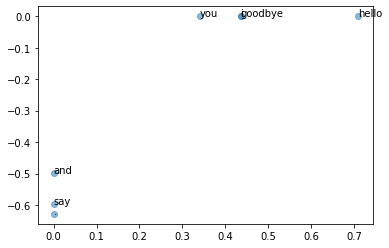

In [9]:
for word, word_id in word_to_id.items():
  plt.annotate(word,(U[word_id,0],U[word_id,1]))

plt.scatter(U[:,0],U[:,1],alpha=0.5)
plt.show()

각 단어를 2차원 벡터로 표현한 후 그래프로 그려보았다. plt.annotate(word,x,y) 메서드는 2차원 그래프상에서 좌표 (x,y) 지점에 word에 담긴 텍스트를 그린다.
___
goodbye와 hello, you와 i가 제법 가까이 있는 걸로 보아 우리의 직관과 비슷한 결과가 나왔음을 알 수 있었다. 그러나 사용한 말뭉치가 아주 작아서 이 결과를 그대로 받아들이기는 어렵다.

### **2.4.4 PTB 데이터셋**

PTB 데이터셋은 적당한 크기의 말뭉치로, 주어진 기법의 품질을 측정하는 벤치마크로 자주 이용된다. 

In [10]:
import sys
sys.path.append('..')
from dataset import ptb

corpus,word_to_id,id_to_word = ptb.load_data('train')

print('말뭉치 크기: ',len(corpus))
print('corpus[:30]: ',corpus[:30])
print()
print('id_to_word[0]: ',id_to_word[0])
print('id_to_word[1]: ',id_to_word[1])
print('id_to_word[2]: ',id_to_word[2])
print()
print("word_to_id['car']: ",word_to_id['car'])
print("word_to_id['happy']: ",word_to_id['happy'])
print("word_to_id['lexus']: ",word_to_id['lexus'])

Done
말뭉치 크기:  929589
corpus[:30]:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]:  aer
id_to_word[1]:  banknote
id_to_word[2]:  berlitz

word_to_id['car']:  3856
word_to_id['happy']:  4428
word_to_id['lexus']:  7426


말뭉치를 다루는 방법은 지금까지와 같다. corpus에는 단어 ID 목록이 저장되고, id_to_word는 단어 ID에서 단어로 변환하는 딕셔너리, word_to_id는 단어에서 단어 ID로 변환하는 딕셔너리이다.

위의 코드에서 ptb.load_data()는 데이터를 읽어 들인다. 이 때 인수로 'train', 'test', 'valid' 중 하나를 지정할 수 있는데, 차례대로 훈련용, 테스트용, 검증용 데이터를 가리킨다.

### **2.4.5 PTB 데이터셋 평가**

In [13]:
import sys
sys.path.append('..')
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb

window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('SVD 계산 ...')
try:
  #truncated SVD (빠르다!)
  from sklearn.utils.extmath import randomized_svd
  U,S,V = randomized_svd(W,n_components=wordvec_size, n_iter=5, random_state=None)

except ImportError:
  # SVD (느리다)
  U,S,V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you','year','car','toyota']
for query in querys:
  most_similar(query,word_to_id,id_to_word,word_vecs,top=5)

동시발생 수 계산 ...
PPMI 계산 ...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
SVD 계산 ...

[query] you
 i: 0.6652265787124634
 we: 0.6218001246452332
 do: 0.5773

PTB 데이터셋에 통계 기반 기법을 적용해보았다.

위 코드에서는 SVD를 수행할 때 sklearn의 randomized_svd() 메서드를 이용했다. 이 메서드는 무작위 수를 사용한 Truncated SVD로, 특잇값이 큰 것들만 계산하여 기본적인 SVD보다 훨씬 빠르다. 

실행 결과를 보면 우리의 직관과 비슷함을 알 수 있다. 